In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
df1 = pd.read_csv('datos_veh32.csv',sep=';' )
df2 = pd.read_csv('datos_veh33.csv',sep=';' )

In [3]:
df1.head(10)

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#X1 = np.array(df1[["timestep_time", "vehicle_pos"]])
#X2 = np.array(df2[["timestep_time", "vehicle_pos"]])

In [5]:
#plt.plot(X1[:, 0], X1[:, 1])
#plt.title('Distancia vs tiempo') 
#plt.xlabel('Tiempo')
#plt.ylabel('Distancia')
#plt.grid()

In [6]:
#plt.plot(X2[:, 0], X2[:, 1])
#plt.title('Distancia vs tiempo') 
#plt.xlabel('Tiempo')
#plt.ylabel('Distancia')
#plt.grid()

In [7]:
X1 = np.array(df1[["vehicle_x", "vehicle_y"]]) #Veh32
X2 = np.array(df2[["vehicle_x", "vehicle_y"]]) #Veh33

In [8]:
X1[148]

array([ 454.15, 2421.36])

In [9]:
len(X1[148:, 0])

4295

Text(370, 2400, 'Plaza de los Virreyes')

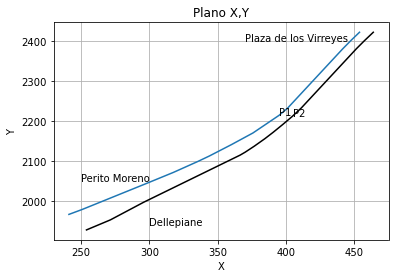

In [10]:
plt.plot(X1[148:, 0], X1[148:, 1],X2[152:, 0], X2[152:, 1],'k')
plt.title('Plano X,Y') 
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.text(395.05,2213.62,r"P1")
plt.text(250,2050,r"Perito Moreno")
plt.text(405.07,2211.81,r"P2")
plt.text(300,1940,r"Dellepiane")
plt.text(370,2400,r"Plaza de los Virreyes")

### Distancia en función del tiempo

In [11]:
X1[176,0]

240.98

In [29]:
#https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/
#Calculo la distancia desde el origen al móvil. Vendría a ser la curva azul (Veh32) del gráfico anterior, o sea,
#la trayectoria del Veh32

distancias_movil_1=[] # Veh32

for n in range(151,177):
     distancias_movil_1.append (np.linalg.norm([X1[n,0], X1[n,1]])) # Norma de un vector

In [30]:
#Calculo la distancia desde el origen al móvil. Vendría a ser la curva azul (Veh33) del gráfico anterior, o sea,
#la trayectoria del Veh33

distancias_movil_2=[] # Veh33

for n in range(151,177):
     distancias_movil_2.append (np.linalg.norm([X2[n,0], X2[n,1]])) # Norma de un vector

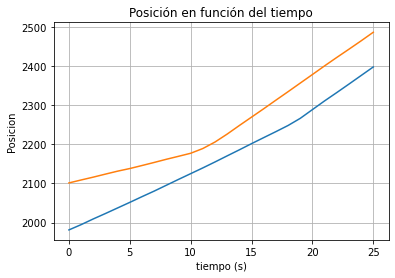

In [32]:
#Grafico Posición en función del tiempo
t=np.arange(0,len(distancias_movil_1),1)

plt.plot(t, distancias_movil_1[::-1], distancias_movil_2[::-1])
plt.title('Posición en función del tiempo') 
plt.xlabel('tiempo (s)')
plt.ylabel('Posicion')
plt.grid()

In [36]:
#Calculo la distancia entre los móviles. Para esto, resto cada coordenda de cda vector y calculo su norma

distancia_entre_autos = []

for n in range(152,177):
        distancia_entre_autos.append (np.linalg.norm([X1[n,0]-X2[n,0], X1[n,1]-X2[n,1]])) # Norma de un vector
        #print([X1[n,0]-X2[n,0], X1[n,1]-X2[n,1]])


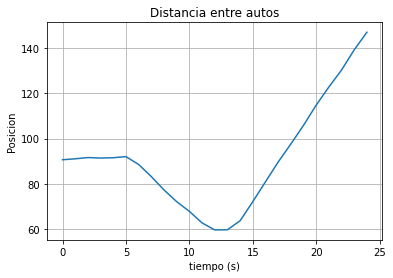

In [37]:
#Grafico las distancias entre los autos
t=np.arange(0,len(distancia_entre_autos),1)

plt.plot(t, distancia_entre_autos)
plt.title('Distancia entre autos') 
plt.xlabel('tiempo (s)')
plt.ylabel('Posicion')
plt.grid()

### Velocidades

In [12]:
V1 = np.array(df1[["timestep_time", "vehicle_speed"]]) #Velocidad veh32
V2 = np.array(df2[["timestep_time", "vehicle_speed"]]) #Velocidad veh33

Text(162, 21.57, 'P2')

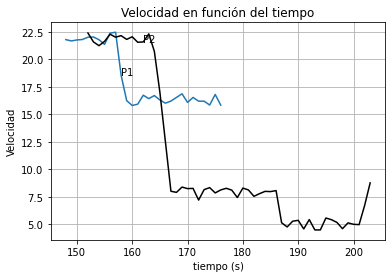

In [73]:
plt.plot(V1[148:, 0], V1[148:, 1],V2[152:, 0], V2[152:, 1],'k')
plt.title('Velocidad en función del tiempo') 
plt.xlabel('tiempo (s)')
plt.ylabel('Velocidad')
plt.grid()
plt.text(158,18.54,r"P1")
plt.text(162,21.57,r"P2")